<a id="table-of-contents"></a>
# 📖 Time Series

- [🧱 Data Setup](#data-setup)
  - [📌 Simulate a univariate time series](#simulate-a-univariate-time-series)
  - [📈 Visualize the time series](#visualize-the-time-series)
  - [🧮 Create train/test split](#create-train-test-split)
  - [🌊 Optional: Add second seasonality/trend](#optional-add-second-seasonalitytrend)
- [📊 Exploratory Analysis](#exploratory-analysis)
  - [📉 Stationarity checks](#stationarity-checks)
  - [📐 Seasonality & trend decomposition](#seasonality--trend-decomposition)
  - [📏 Autocorrelation & partial autocorrelation](#autocorrelation--partial-autocorrelation)
- [🧪 Forecasting Baselines](#forecasting-baselines)
  - [📉 Naive Forecast](#naive-forecast)
  - [📊 Moving Average](#moving-average)
  - [📈 Simple Exponential Smoothing](#simple-exponential-smoothing)
  - [📋 Baseline Evaluation](#baseline-evaluation)
- [⚙️ ARIMA Family](#arima-family)
  - [🧩 AR, MA, ARMA](#ar-ma-arma)
  - [🛠️ ARIMA](#arima)
  - [🔁 SARIMA](#sarima)
  - [🔍 Residual diagnostics](#residual-diagnostics)
  - [📋 ARIMA Evaluation](#arima-evaluation)
- [🌊 State Space Models](#state-space-models)
  - [🧠 Intro to Kalman Filters](#intro-to-kalman-filters)
  - [📦 Statsmodels or Prophet](#statsmodels-or-prophet)
  - [📋 State Space Forecast Evaluation](#state-space-forecast-evaluation)
- [🧠 ML/Hybrid Approaches (Optional)](#mlhybrid-approaches-optional)
  - [🧮 Feature engineering](#feature-engineering)
  - [⚡ XGBoost or LightGBM](#xgboost-or-lightgbm)
  - [📋 ML Model Evaluation](#ml-model-evaluation)
- [🧮 Evaluation Summary](#evaluation-summary)
  - [📊 Metric comparison table](#metric-comparison-table)
  - [📈 Actual vs predicted plots](#actual-vs-predicted-plots)
- [📦 Deployment Considerations](#deployment-considerations)
  - [🧾 What to save](#what-to-save)
  - [🔄 Re-forecasting workflows](#re-forecasting-workflows)
- [🔚 Closing Notes](#closing-notes)
  - [🧠 Strengths/limits recap](#strengthslimits-recap)
  - [🚀 Next steps](#next-steps)

___


<a id="data-setup"></a>
# 🧱 Data Setup


<a id="simulate-a-univariate-time-series"></a>
#### 📌 Simulate a univariate time series


In [4]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Simulate time series components
n_periods = 200
trend = np.linspace(0, 10, n_periods)
seasonality = 5 * np.sin(2 * np.pi * np.arange(n_periods) / 12)
noise = np.random.normal(0, 1, n_periods)

# Final series
y = trend + seasonality + noise
dates = pd.date_range(start="2020-01-01", periods=n_periods, freq="M")
ts = pd.DataFrame({"date": dates, "value": y})

ts.head()


,date,value
0,2020-01-31,0.496714
1,2020-02-29,2.411987
2,2020-03-31,5.078318
3,2020-04-30,6.673784
4,2020-05-31,4.296979


<a id="visualize-the-time-series"></a>
#### 📈 Visualize the time series


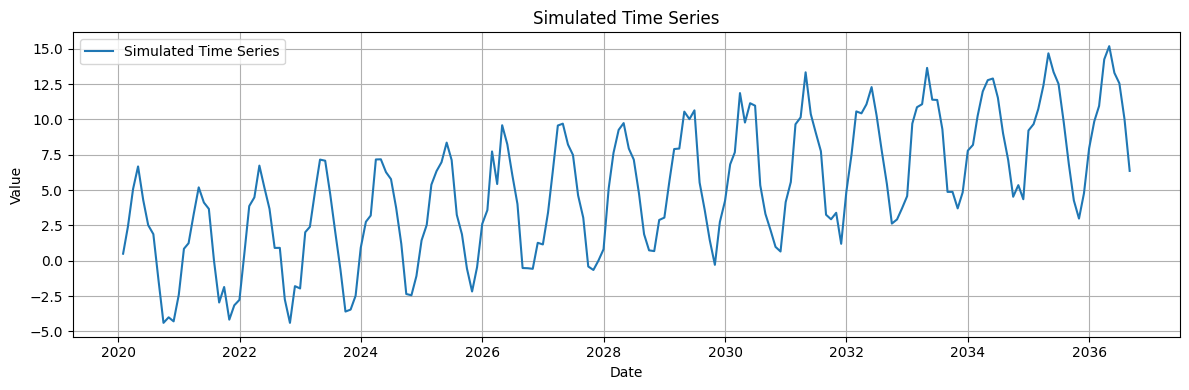

In [5]:
# 📈 Visualize the time series

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(ts["date"], ts["value"], label="Simulated Time Series")
plt.title("Simulated Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


<a id="create-train-test-split"></a>
#### 🧮 Create train/test split


<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🧮 Why It's Different
In time series, you can’t randomly split rows into train/test like traditional ML. Why?

- Time flows **sequentially**, so past should predict future.
- Shuffling would **leak future info into past** — a cardinal sin in forecasting.

##### ⚠️ Common Time Series Splits
- Use **chronological cutoff**, e.g., first 80% as train, last 20% as test.
- Use a **rolling forecast origin** if you want multiple test windows.
- For production-style setups, use a **fixed origin test set** and predict forward.

</details>


In [7]:
train_ratio = 0.8
cutoff = int(len(ts) * train_ratio)

train = ts.iloc[:cutoff].copy()
test = ts.iloc[cutoff:].copy()

print(f"Train range: {train['date'].min().date()} to {train['date'].max().date()}")
print(f"Test range:  {test['date'].min().date()} to {test['date'].max().date()}")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train range: 2020-01-31 to 2033-04-30
Test range:  2033-05-31 to 2036-08-31
Train shape: (160, 2)
Test shape: (40, 2)


<a id="optional-add-second-seasonalitytrend"></a>
#### 🌊 Optional: Add second seasonality/trend


[Back to the top](#table-of-contents)
___


<a id="exploratory-analysis"></a>
# 📊 Exploratory Analysis


<a id="stationarity-checks"></a>
#### 📉 Stationarity checks


<a id="seasonality--trend-decomposition"></a>
#### 📐 Seasonality & trend decomposition


<a id="autocorrelation--partial-autocorrelation"></a>
#### 📏 Autocorrelation & partial autocorrelation


[Back to the top](#table-of-contents)
___


<a id="forecasting-baselines"></a>
# 🧪 Forecasting Baselines


<a id="naive-forecast"></a>
#### 📉 Naive Forecast


<a id="moving-average"></a>
#### 📊 Moving Average


<a id="simple-exponential-smoothing"></a>
#### 📈 Simple Exponential Smoothing


<a id="baseline-evaluation"></a>
#### 📋 Baseline Evaluation


[Back to the top](#table-of-contents)
___


<a id="arima-family"></a>
# ⚙️ ARIMA Family


<a id="ar-ma-arma"></a>
#### 🧩 AR, MA, ARMA


<a id="arima"></a>
#### 🛠️ ARIMA


<a id="sarima"></a>
#### 🔁 SARIMA


<a id="residual-diagnostics"></a>
#### 🔍 Residual diagnostics


<a id="arima-evaluation"></a>
#### 📋 ARIMA Evaluation


[Back to the top](#table-of-contents)
___


<a id="state-space-models"></a>
# 🌊 State Space Models


<a id="intro-to-kalman-filters"></a>
#### 🧠 Intro to Kalman Filters


<a id="statsmodels-or-prophet"></a>
#### 📦 Statsmodels or Prophet


<a id="state-space-forecast-evaluation"></a>
#### 📋 State Space Forecast Evaluation


[Back to the top](#table-of-contents)
___


<a id="mlhybrid-approaches-optional"></a>
# 🧠 ML/Hybrid Approaches (Optional)


<a id="feature-engineering"></a>
#### 🧮 Feature engineering


<a id="xgboost-or-lightgbm"></a>
#### ⚡ XGBoost or LightGBM


<a id="ml-model-evaluation"></a>
#### 📋 ML Model Evaluation


[Back to the top](#table-of-contents)
___


<a id="evaluation-summary"></a>
# 🧮 Evaluation Summary


<a id="metric-comparison-table"></a>
#### 📊 Metric comparison table


<a id="actual-vs-predicted-plots"></a>
#### 📈 Actual vs predicted plots


[Back to the top](#table-of-contents)
___


<a id="deployment-considerations"></a>
# 📦 Deployment Considerations


<a id="what-to-save"></a>
#### 🧾 What to save


<a id="re-forecasting-workflows"></a>
#### 🔄 Re-forecasting workflows


[Back to the top](#table-of-contents)
___


<a id="closing-notes"></a>
# 🔚 Closing Notes


<a id="strengthslimits-recap"></a>
#### 🧠 Strengths/limits recap


<a id="next-steps"></a>
#### 🚀 Next steps


[Back to the top](#table-of-contents)
___
